In [ ]:
from tools import show_df

from nba_api.stats.endpoints import playercareerstats

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


Jalen Williams Career Stats

In [7]:
career = playercareerstats.PlayerCareerStats(player_id="1631114")
career_data = career.get_data_frames()[0]

career_data['PLAYER_AGE'] = pd.to_numeric(career_data['PLAYER_AGE'], errors='coerce')
career_data['PTS'] = pd.to_numeric(career_data['PTS'], errors='coerce')

show_df(career_data)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1631114,2022-23,00,1610612760,OKC,22.0,75,62,2276,414,794,0.521,73,205,0.356,155,191,0.812,84,253,337,248,103,35,123,191,1056
1,1631114,2023-24,00,1610612760,OKC,23.0,71,71,2224,536,993,0.540,103,241,0.427,180,221,0.814,37,245,282,322,80,45,123,175,1355
2,1631114,2024-25,00,1610612760,OKC,24.0,69,69,2237,565,1168,0.484,124,340,0.365,236,299,0.789,59,310,369,354,111,46,150,158,1490


In [8]:
career_data['PPG'] = career_data['PTS'] / career_data['GP']
career_data['APG'] = career_data['AST'] / career_data['GP']
career_data['RPG'] = career_data['REB'] / career_data['GP']
career_data['SPG'] = career_data['STL'] / career_data['GP']
career_data['BPG'] = career_data['BLK'] / career_data['GP']
career_data['TPG'] = career_data['TOV'] / career_data['GP']
show_df(career_data[['PLAYER_AGE', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PPG']])

,PLAYER_AGE,RPG,APG,SPG,BPG,TPG,PPG
0,22.0,4.493333,3.306667,1.373333,0.466667,1.640000,14.080000
1,23.0,3.971831,4.535211,1.126761,0.633803,1.732394,19.084507
2,24.0,5.347826,5.130435,1.608696,0.666667,2.173913,21.594203


Linear Regression

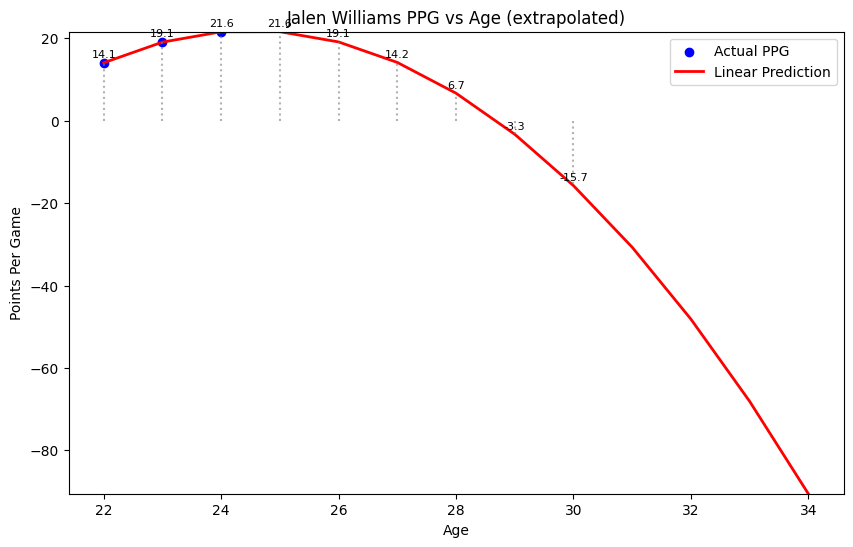

In [9]:
# regression vars
X = career_data[['PLAYER_AGE']]
y = career_data['PPG']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = pd.DataFrame(np.arange(22, 35).reshape(-1, 1), columns=['PLAYER_AGE'])
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(10,6))
plt.scatter(career_data['PLAYER_AGE'], career_data['PPG'], color='blue', label='Actual PPG')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Linear Prediction')

for age, pts in zip(career_data['PLAYER_AGE'], career_data['PPG']):
    plt.vlines(x=age, ymin=0, ymax=pts, linestyles='dotted', color='gray', alpha=0.6)
    plt.text(age, pts + 0.8, f'{pts:.1f}', ha='center', va='bottom', fontsize=8)

for age, pts in zip(X_plot['PLAYER_AGE'], y_plot):
    if 25 <= age <= 30:  # only for ages 25-30
        plt.vlines(x=age, ymin=0, ymax=pts, linestyles='dotted', color='gray', alpha=0.6)
        plt.text(age, pts + 0.8, f'{pts:.1f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Age')
plt.ylabel('Points Per Game')
plt.title('Jalen Williams PPG vs Age (extrapolated)')
plt.legend()
plt.margins(y=0)
plt.show()
